In [21]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
TRAIN_PATH = "../dataset/PlantVillage/train"
VAL_PATH   = "../dataset/PlantVillage/val"


In [23]:
classes = [
    cls for cls in os.listdir(TRAIN_PATH)
    if os.path.isdir(os.path.join(TRAIN_PATH, cls))
]

len(classes)


38

In [24]:
class_counts = {
    cls: len(os.listdir(os.path.join(TRAIN_PATH, cls)))
    for cls in classes
}

df = pd.DataFrame.from_dict(class_counts, orient="index", columns=["image_count"])
df.sort_values(by="image_count", ascending=False).head()


,image_count
Orange___Haunglongbing_(Citrus_greening),4405
Tomato___Tomato_Yellow_Leaf_Curl_Virus,4286
Soybean___healthy,4072
Peach___Bacterial_spot,1838
Tomato___Bacterial_spot,1702


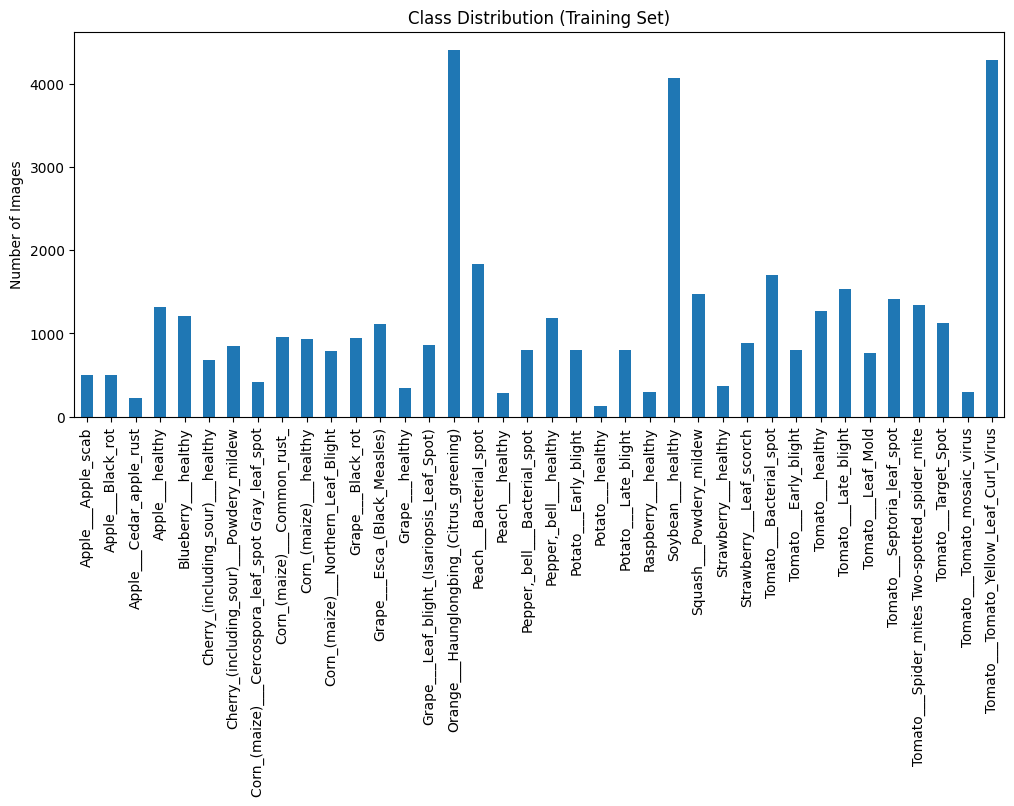

In [25]:
plt.figure(figsize=(12,5))
df["image_count"].plot(kind="bar")
plt.title("Class Distribution (Training Set)")
plt.ylabel("Number of Images")
plt.show()


(-0.5, 255.5, 255.5, -0.5)

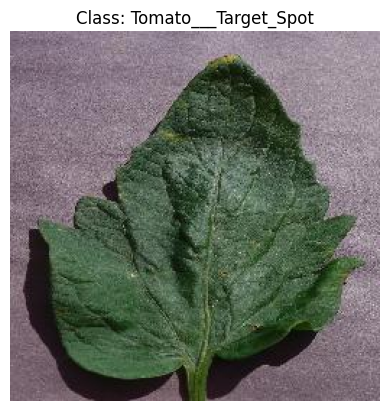

In [28]:
valid_ext = (".jpg", ".jpeg", ".png")

cls = random.choice(classes)
class_path = os.path.join(TRAIN_PATH, cls)

images = [
    img for img in os.listdir(class_path)
    if img.lower().endswith(valid_ext)
]

img_path = os.path.join(class_path, random.choice(images))

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Class: {cls}")
plt.axis("off")
